# Resolution Target Results Figure

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset
from matplotlib_scalebar.scalebar import ScaleBar

# Platform imports
import os, glob
from os.path import expanduser
import numpy as np

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

In [24]:
# Load data
fig_sns = np.load('/Users/zfphil/datasets/motiondeblur/output/paper/figure_sns_output.npz') 
fig_strobe = np.load('/Users/zfphil/datasets/motiondeblur/output/paper/figure_strobe_raw_output.npz') 
fig_coded = np.load('/Users/zfphil/datasets/motiondeblur/output/paper/figure_coded_refined_output.npz') 

# Define output path
output_path = os.path.expanduser('~/Desktop')

# Whether to save figures
save = True

### Stop and stare figure

<IPython.core.display.Javascript object>


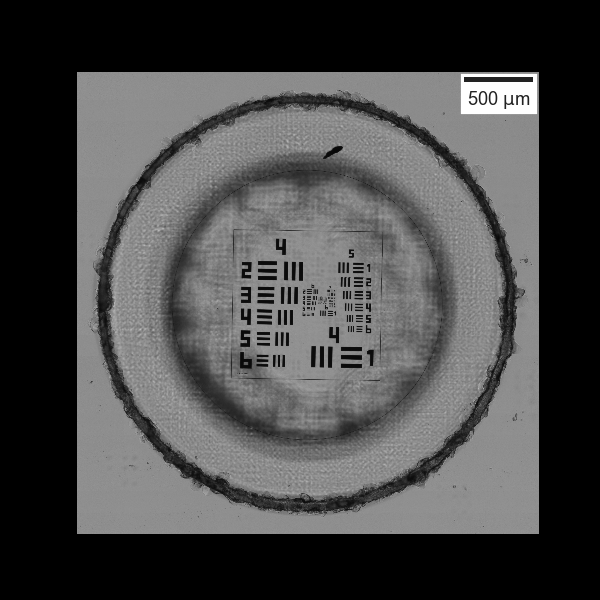

<IPython.core.display.Javascript object>


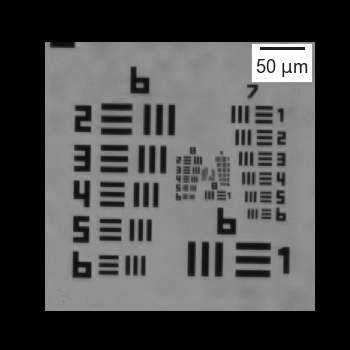

In [99]:
stitched_sns = fig_sns['stitched']
crop_roi = yp.Roi(**fig_sns['crop_roi'].item())
zoom_roi = yp.Roi(**fig_sns['zoom_roi'].item())
label = fig_sns['label'].item(0)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))
    plt.imshow(stitched_sns[crop_roi.slice])
    clim = plt.gci().get_clim()
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    plt.clim((-1,1))
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label +'.png'), transparent=True, dpi=300)
    
with plt.style.context('dark_background'):
    plt.figure(figsize=(3.5,3.5))
    plt.imshow(stitched_sns[zoom_roi.slice])
    plt.clim((-1,1))
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_zoom.png'), transparent=True, dpi=300)


<IPython.core.display.Javascript object>


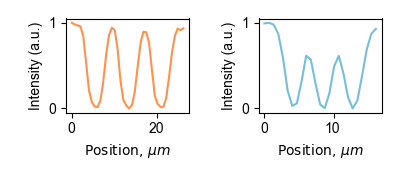

In [101]:
ps = 0.672

# Group  7, 1
cutline_1_roi = yp.Roi(start=(123,305), shape=(1,40))
cutline_1_values = yp.vec(stitched_sns[zoom_roi.slice][cutline_1_roi.slice])

# Group  7, 6
cutline_2_roi = yp.Roi(start=(288,333), shape=(1,25))
cutline_2_values = yp.vec(stitched_sns[zoom_roi.slice][cutline_2_roi.slice])

with plt.style.context('default'):
    plt.figure(figsize=(4,1.75))
    plt.subplot(121)
    x1 = ps * np.arange(len(cutline_1_values))
    y1 = cutline_1_values - np.min(cutline_1_values)
    y1 /= np.max(y1)
    plt.plot(x1, y1, c='y')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')
    plt.subplot(122)
    x2 = ps * np.arange(len(cutline_2_values))
    y2 = cutline_2_values - np.min(cutline_2_values)
    y2 /= np.max(y2)
    plt.plot(x2, y2, c='c')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')

    plt.tight_layout()

    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_cutline.pdf'), transparent=True, dpi=300)


<IPython.core.display.Javascript object>


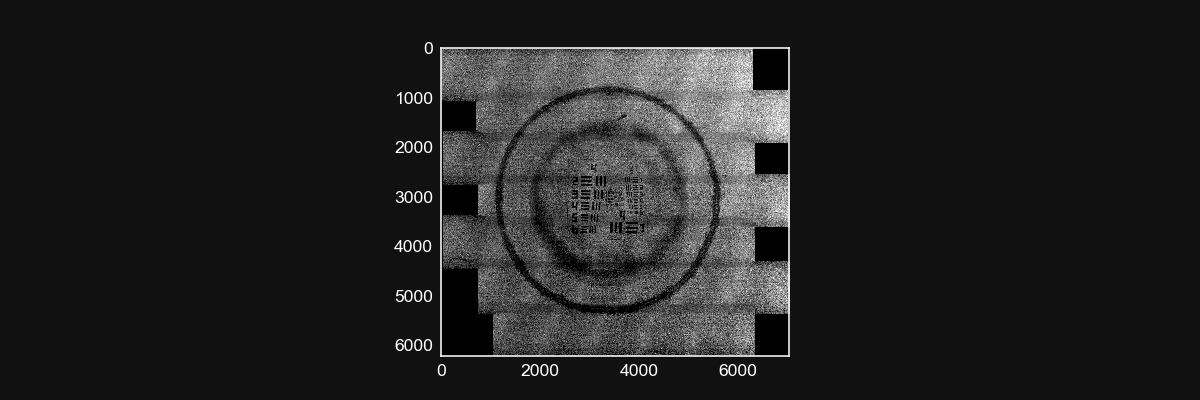

In [73]:
stitched_strobe = fig_strobe['stitched'].copy()

# # stitched_strobe += 3

# Subtract bg
y, x = estimateBackgroundPolynomial(stitched_strobe)
bg = yp.outer(y,x)
stitched_strobe = stitched_strobe - bg / 10 # No idea why 1/10...

plt.figure()
plt.imshow(stitched_strobe)
plt.clim((-0.2,0.4))

## Strobed Figure

In [82]:
save=True

<IPython.core.display.Javascript object>


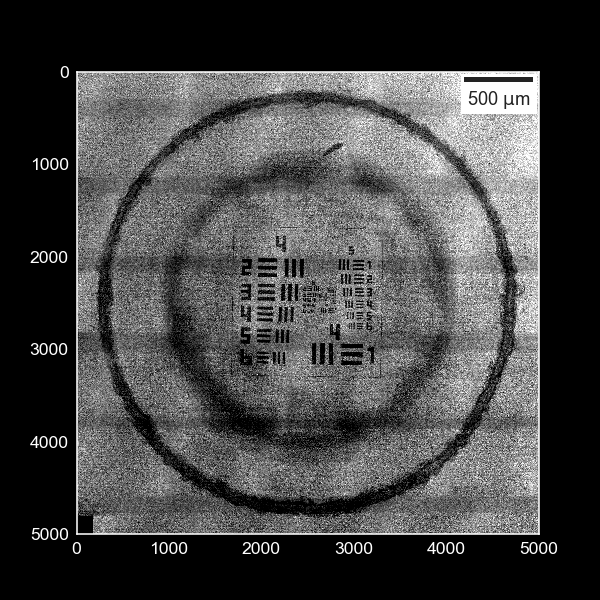

<IPython.core.display.Javascript object>


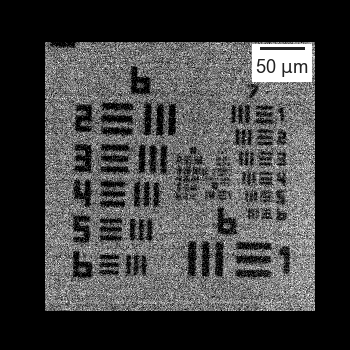

In [102]:
from libwallerlab.projects.motiondeblur.recon import estimateBackgroundPolynomial

stitched_strobe = fig_strobe['stitched']
crop_roi = yp.Roi(**fig_strobe['crop_roi'].item())
zoom_roi = yp.Roi(**fig_strobe['zoom_roi'].item())
label = fig_strobe['label'].item(0)

# Subtract bg
y, x = estimateBackgroundPolynomial(stitched_strobe)
bg = yp.outer(y,x)
stitched_strobe = stitched_strobe - bg / 10 # No idea why 1/10...


with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))
    plt.imshow(stitched_strobe[crop_roi.slice])
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.clim((-0.2,0.25))
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label +'.png'), transparent=True, dpi=300)
    

with plt.style.context('dark_background'):
    plt.figure(figsize=(3.5,3.5))
    plt.imshow(stitched_strobe[zoom_roi.slice])
    plt.clim((-0.2,0.25))
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_zoom.png'), transparent=True, dpi=300)


<IPython.core.display.Javascript object>


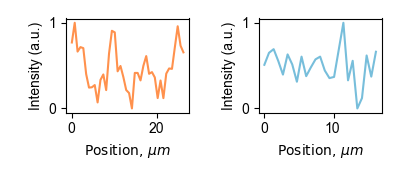

In [103]:
ps = 0.672

# Group  7, 1
cutline_1_roi = yp.Roi(start=(123,305), shape=(1,40))
cutline_1_values = yp.vec(stitched_strobe[zoom_roi.slice][cutline_1_roi.slice])

# Group  7, 6
cutline_2_roi = yp.Roi(start=(288,333), shape=(1,25))
cutline_2_values = yp.vec(stitched_strobe[zoom_roi.slice][cutline_2_roi.slice])

with plt.style.context('default'):
    plt.figure(figsize=(4,1.75))
    plt.subplot(121)
    x1 = ps * np.arange(len(cutline_1_values))
    y1 = cutline_1_values - np.min(cutline_1_values)
    y1 /= np.max(y1)
    plt.plot(x1, y1, c='y')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')
    plt.subplot(122)
    x2 = ps * np.arange(len(cutline_2_values))
    y2 = cutline_2_values - np.min(cutline_2_values)
    y2 /= np.max(y2)
    plt.plot(x2, y2, c='c')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')

    plt.tight_layout()

    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_cutline.pdf'), transparent=True, dpi=300)

## Coded Reconstruction

<IPython.core.display.Javascript object>


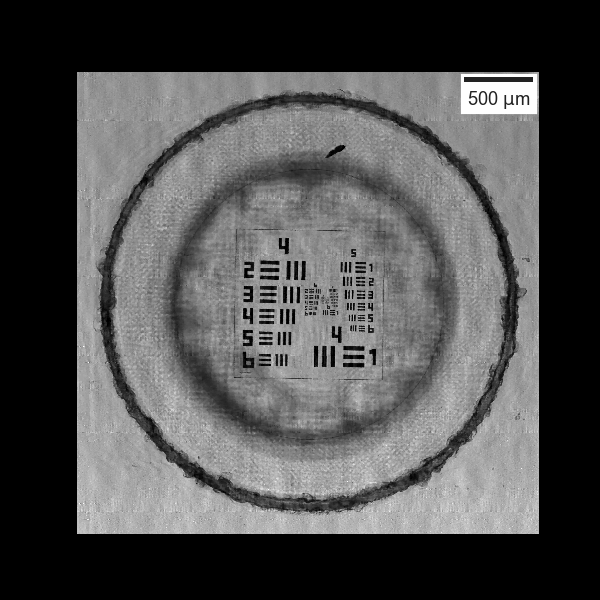

<IPython.core.display.Javascript object>


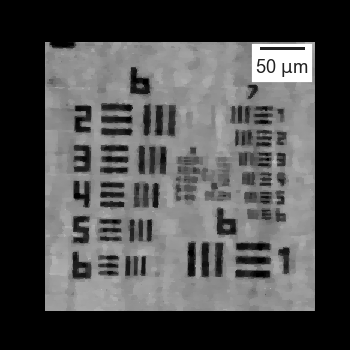

In [104]:
stitched_coded = fig_coded['stitched']
crop_roi = yp.Roi(**fig_coded['crop_roi'].item())
zoom_roi = yp.Roi(**fig_coded['zoom_roi'].item())
label = fig_coded['label'].item(0)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))
    plt.imshow(stitched_coded[crop_roi.slice])
    clim = plt.gci().get_clim()
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    plt.clim((-1,1))
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label +'.png'), transparent=True, dpi=300)
    

with plt.style.context('dark_background'):
    plt.figure(figsize=(3.5,3.5))
    plt.imshow(stitched_coded[zoom_roi.slice])
    plt.clim((-1,1))
    scalebar = ScaleBar(0.67, 'um') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    
    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_zoom.png'), transparent=True, dpi=300)


<IPython.core.display.Javascript object>


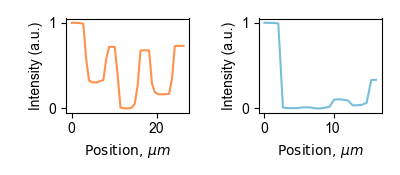

In [105]:
ps = 0.672

# Group  7, 1
cutline_1_roi = yp.Roi(start=(123,305), shape=(1,40))
cutline_1_values = yp.vec(stitched_coded[zoom_roi.slice][cutline_1_roi.slice])

# Group  7, 6
cutline_2_roi = yp.Roi(start=(288,333), shape=(1,25))
cutline_2_values = yp.vec(stitched_coded[zoom_roi.slice][cutline_2_roi.slice])

with plt.style.context('default'):
    plt.figure(figsize=(4,1.75))
    plt.subplot(121)
    x1 = ps * np.arange(len(cutline_1_values))
    y1 = cutline_1_values - np.min(cutline_1_values)
    y1 /= np.max(y1)
    plt.plot(x1, y1, c='y')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')
    plt.subplot(122)
    x2 = ps * np.arange(len(cutline_2_values))
    y2 = cutline_2_values - np.min(cutline_2_values)
    y2 /= np.max(y2)
    plt.plot(x2, y2, c='c')
    plt.xlabel('Position, $\mu m$')
    plt.ylabel('Intensity (a.u.)')

    plt.tight_layout()

    if save:
        plt.savefig(os.path.join(output_path, 'figure_' + label + '_cutline.pdf'), transparent=True, dpi=300)
